In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\f\.cache\kagglehub\datasets\madhuraatmarambhagat\crop-recommendation-dataset\versions\1


In [3]:
import pandas as pd
df=pd.read_csv(path + "/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df['label'].value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
df_filtrado = df[df['label'].isin(['coffee', 'rice'])]
df_filtrado.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,90.545000,38.160000,34.905000,24.614905,70.571334,6.607890,197.123704
std,16.142518,12.108156,5.859835,2.009213,12.472871,0.643401,49.463287
min,60.000000,15.000000,25.000000,20.045414,50.045570,5.005307,115.156401
25%,79.750000,29.000000,30.000000,23.315325,57.688646,6.156135,158.315926
50%,90.500000,38.000000,35.000000,24.776151,75.035374,6.736379,192.428426
75%,103.000000,47.000000,40.000000,26.337920,82.180023,7.069619,233.113720
max,120.000000,60.000000,45.000000,27.923744,84.969072,7.868475,298.560117


In [7]:
df_filtrado['label_num'] = df_filtrado['label'].map({'rice': 0, 'coffee': 1})



C:\Users\f\AppData\Local\Temp\ipykernel_31096\404320598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['label_num'] = df_filtrado['label'].map({'rice': 0, 'coffee': 1})


In [8]:
df_filtrado

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [9]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

scaler = MinMaxScaler()

df_filtrado[colunas_numericas] = scaler.fit_transform(df_filtrado[colunas_numericas])

print(df_filtrado.head())


          N         P     K  temperature  humidity        ph  rainfall label  \
0  0.500000  0.600000  0.90     0.105902  0.915062  0.523084  0.478612  rice   
1  0.416667  0.955556  0.80     0.218961  0.866868  0.709979  0.607944  rice   
2  0.000000  0.888889  0.95     0.375593  0.924168  0.990127  0.811368  rice   
3  0.233333  0.444444  0.75     0.818153  0.862250  0.689828  0.696320  rice   
4  0.300000  0.600000  0.85     0.010759  0.903669  0.916176  0.804569  rice   

   label_num  
0          0  
1          0  
2          0  
3          0  
4          0  


C:\Users\f\AppData\Local\Temp\ipykernel_31096\4261046012.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[colunas_numericas] = scaler.fit_transform(df_filtrado[colunas_numericas])


In [10]:
X = df_filtrado[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_filtrado['label_num']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(160, 7) (40, 7)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


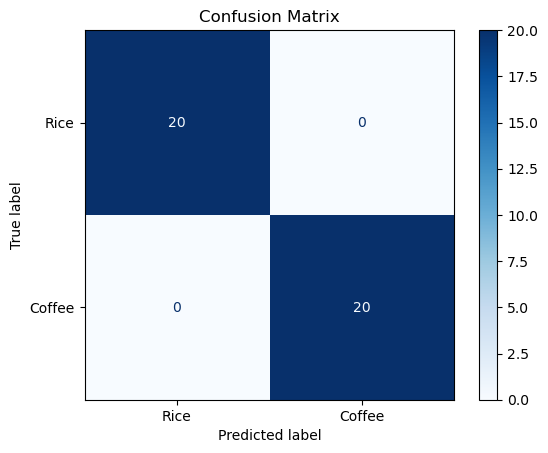

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
'''Classificador de Rede Neural para Previsão de Culturas
Este código treina um classificador de rede neural para prever se uma determinada combinação de condições do solo e clima é adequada para o cultivo de arroz ou café.
'''

# Treinar o modelo
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

model.fit(X_train, y_train)
# Fazer previsões
y_pred = model.predict(X_test)
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rice', 'Coffee'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [13]:
df_filtrado= df.copy()
df_filtrado.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
df_filtrado['label_num'] = pd.factorize(df_filtrado['label'])[0]

In [15]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

scaler = MinMaxScaler()

df_filtrado[colunas_numericas] = scaler.fit_transform(df_filtrado[colunas_numericas])

print(df_filtrado.head())

          N         P      K  temperature  humidity        ph  rainfall label  \
0  0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458  rice   
1  0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675  rice   
2  0.428571  0.357143  0.195     0.406854  0.793977  0.674219  0.875710  rice   
3  0.528571  0.214286  0.175     0.506901  0.768751  0.540508  0.799905  rice   
4  0.557143  0.264286  0.185     0.324378  0.785626  0.641291  0.871231  rice   

   label_num  
0          0  
1          0  
2          0  
3          0  
4          0  


In [16]:
X = df_filtrado[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_filtrado['label_num']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(1760, 7) (440, 7)


c:\Users\f\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.97
Precision (macro): 0.97
Recall (macro): 0.97
F1 Score (macro): 0.97


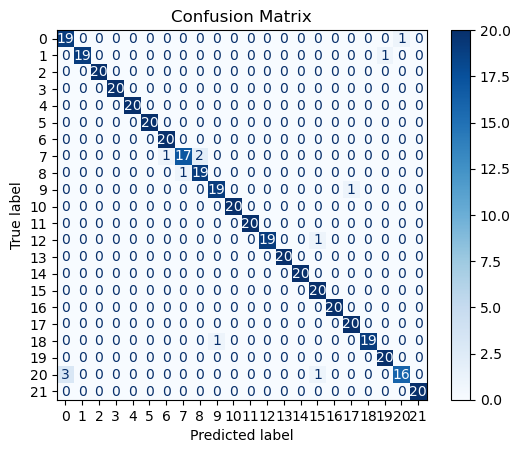

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
'''Classificador de Rede Neural para Previsão de Culturas
Este código treina um classificador de rede neural para prever se uma determinada combinação de condições do solo e clima é adequada para o cultivo de 22 culturas diferentes.
'''

# Treinar o modelo
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

model.fit(X_train, y_train)
# Fazer previsões
y_pred = model.predict(X_test)
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')  
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1 Score (macro): {f1:.2f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
# Se quiser mostrar todos os labels únicos do seu y:
labels_unicos = sorted(set(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_unicos)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = len(np.unique(y_train))  # número de classes únicas no treino

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

print(y_train_cat.shape)
print(y_test_cat.shape)

(1760, 22)
(440, 22)


In [ ]:
from sklearn.model_selection import train_test_split

# Separa 30% do X_train para validação (e 70% para treino)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train_cat,         
    test_size=0.3,      
    random_state=42,
    stratify=y_train
)

print(f"Treino final: {X_train_final.shape}, Validação: {X_val.shape}")


Treino final: (1232, 7), Validação: (528, 7)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_final, y_train_final,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=50,
    callbacks=[early_stopping]
)


Epoch 1/100


c:\Users\f\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0897 - loss: 3.0703 - val_accuracy: 0.2917 - val_loss: 2.9728
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1916 - loss: 2.9459 - val_accuracy: 0.3220 - val_loss: 2.8014
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2928 - loss: 2.7644 - val_accuracy: 0.3750 - val_loss: 2.5269
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3265 - loss: 2.4839 - val_accuracy: 0.4697 - val_loss: 2.1876
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3803 - loss: 2.1630 - val_accuracy: 0.6269 - val_loss: 1.8569
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4498 - loss: 1.8889 - val_accuracy: 0.6989 - val_loss: 1.5797
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5285 - loss: 1.6141 - val_accuracy: 0.7670 - val_loss: 1.3548
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5594 - loss: 1.4468 - val_accuracy: 0.7689 - val_loss: 1.

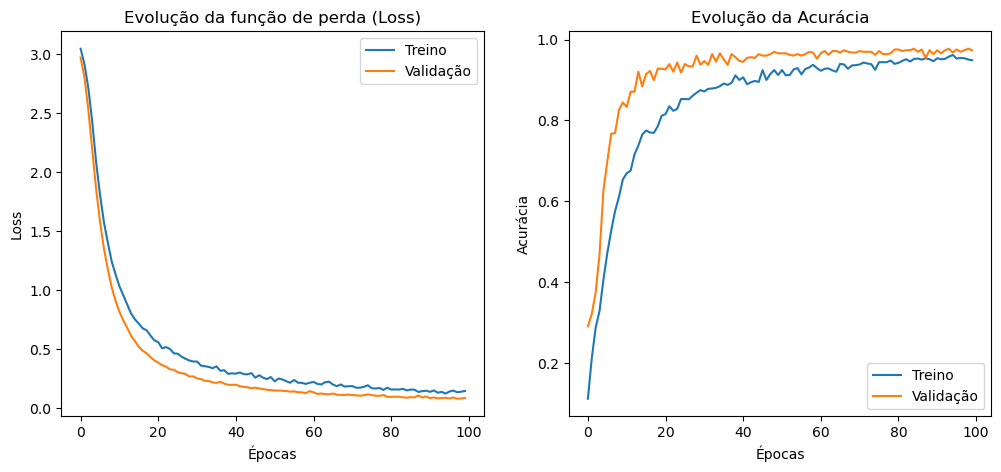

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da função de perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


In [ ]:
labels = [
    'rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple',
    'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate',
    'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas',
    'kidneybeans', 'chickpea', 'coffee'
]

from sklearn.metrics import classification_report
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = y_test

print(classification_report(y_true, y_pred, target_names=labels))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

        rice       0.95      0.90      0.92        20
       maize       1.00      0.90      0.95        20
        jute       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
     coconut       1.00      0.95      0.97        20
      papaya       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
       apple       0.95      1.00      0.98        20
   muskmelon       1.00      0.95      0.97        20
  watermelon       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
 pomegranate       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.

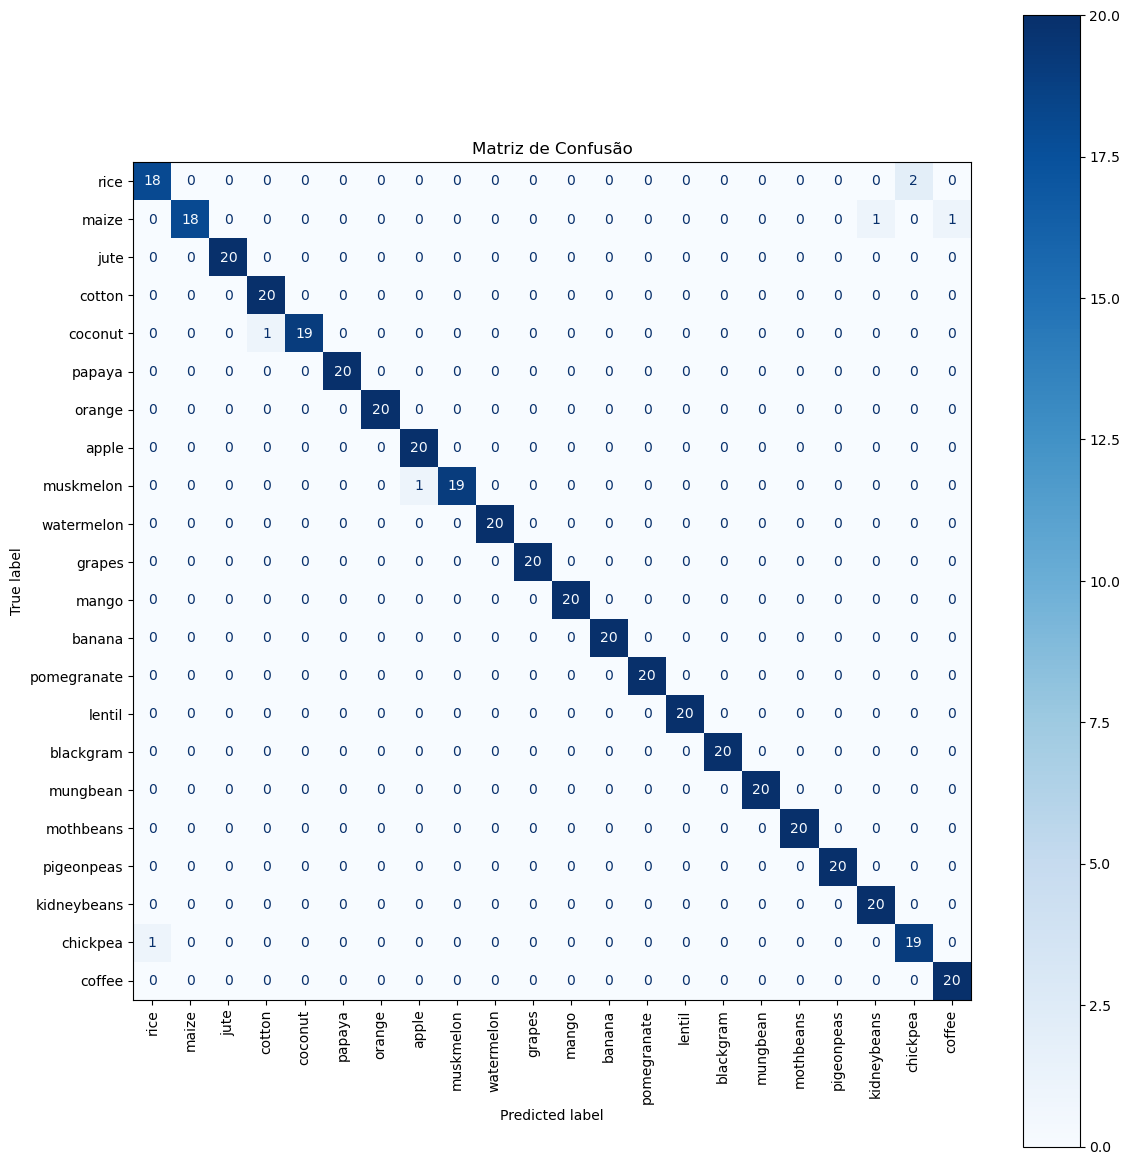

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

unique_labels = np.unique(np.concatenate([y_test, y_pred]))

cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

plt.figure(figsize=(12, 12))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[i] for i in unique_labels])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90, ax=plt.gca())

plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()
